In [9]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matplotlib inline

In [4]:
simulator = Aer.get_backend('qasm_simulator')

In [26]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [31]:
# Initializing the variables
J = 0.5
h1 = -0.5
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        res[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

In [21]:
print(res)

[[[1000.    0.    0.    0.]
  [ 807.   89.   91.   13.]
  [ 437.  220.  237.  106.]
  [ 124.  229.  218.  429.]
  [  13.   91.   82.  814.]
  [   0.    0.    0. 1000.]
  [   7.  105.   77.  811.]
  [ 141.  208.  223.  428.]
  [ 425.  244.  210.  121.]
  [ 825.   77.   86.   12.]
  [1000.    0.    0.    0.]]

 [[1000.    0.    0.    0.]
  [ 816.   90.   85.    9.]
  [ 437.  217.  213.  133.]
  [ 146.  212.  214.  428.]
  [   5.   67.   87.  841.]
  [   0.    0.    0. 1000.]
  [  10.   83.   96.  811.]
  [ 122.  218.  237.  423.]
  [ 410.  235.  224.  131.]
  [ 806.   95.   88.   11.]
  [1000.    0.    0.    0.]]

 [[1000.    0.    0.    0.]
  [ 811.   78.  102.    9.]
  [ 429.  230.  226.  115.]
  [ 132.  232.  241.  395.]
  [   6.   74.   89.  831.]
  [   0.    0.    0. 1000.]
  [   7.   77.   75.  841.]
  [ 132.  212.  220.  436.]
  [ 449.  242.  197.  112.]
  [ 800.   90.   94.   16.]
  [1000.    0.    0.    0.]]

 [[1000.    0.    0.    0.]
  [ 809.   87.   96.    8.]
  [ 408.  219.

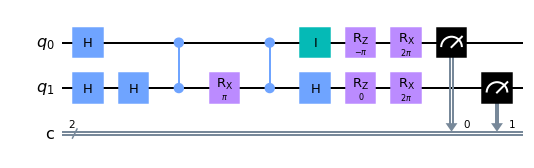

In [29]:
#Draw the current circuit
qc.draw(output='mpl')

{'00': 1000}


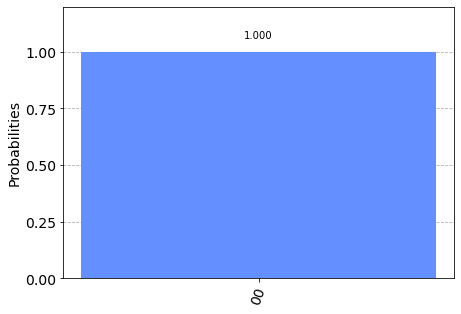

In [40]:
result = execute(qc, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

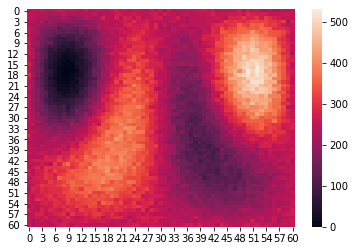

In [37]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])